# Project: Investigate a Dataset - European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset used in this report is named "European Soccer Database" and is available from Kaggle. The dataset contains the following csv files (tables):
- Country
- League
- Team
- Team attributes
- Match
- Player
- Player attributes

Match data (Result, formation, etc) is scraped from http://football-data.mx-api.enetscores.com/
Player data is scraped from the FIFA games available on the website: http://sofifa.com/
Betting odds are scraped from http://www.football-data.co.uk/

Data is from 2008-2016 and contains the top leagues from several european countries. 


### Question(s) for Analysis
Below are the questions I would like to answer from the dataset:

1. Which country and leauge has the highst number of average goals scored per match throuhg the years? 

2. Which are the most winning teams per country for the time period?

In [68]:
# Imports and Inline settings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
%matplotlib inline

In [66]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.1

In [67]:
# Upgrade seaborn to add better support for lineplots
# !pip install --upgrade seaborn

In [70]:
# Unzip csv files:
with zipfile.ZipFile("Database_Soccer/Archive.zip", "r") as my_zip:
    my_zip.extractall('Database_Soccer/.')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [25]:
# Load data
df_match = pd.read_csv('Database_Soccer/Match.csv')
df_country = pd.read_csv('Database_Soccer/Country.csv')
df_leauge = pd.read_csv('Database_Soccer/League.csv')
df_team = pd.read_csv('Database_Soccer/Team.csv')

#### Investigate match data
Check number of rows and columns

Create dataset containing relevant rows for further investigation

Check characteristics (for relevant columns)

Sample dataset

In [26]:
# Investigate rows and columns
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


Since there are many irrelevant rows to for the posed question, take a sample of the rows to decide witch are relevant

In [27]:
# Ensure that pandas displays all columns (to figure out what is relevant)
pd.set_option('display.max_columns', None)

df_match.head(20)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.30,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.20,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.30,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.20,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.30,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.60,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.00,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.40,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.50,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Based on the question and the overview of rows the importan information is anything regarding: teams, league, country, result and time.

In [28]:
# limit to columns relevant to the posed question and display info
df_match = df_match[['country_id', 'league_id', 'season', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]

df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.8+ MB


Based on the above result there are no columns with null values but to columns containing Objects (strings), we will need to handle the date object later to make it easier to work with.

In [29]:
# Investigate columns
df_match.describe()

,country_id,league_id,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,11738.630317,11738.630317,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938
std,7553.936759,7553.936759,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110
min,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000
25%,4769.000000,4769.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000
50%,10257.000000,10257.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000
75%,17642.000000,17642.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000
max,24558.000000,24558.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000


Not too much informaiton to be gained here, maximum number of scored goals are 10 and minimum is 0 which seams plausible.

In [30]:
# Sample data
df_match.head()

,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3


#### Investigate country data
Check number of rows and columns

Check characteristics

Sample dataset

In [31]:
# Investigate rows and columns
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


Only contains 11 rows, no null values.

In [32]:
# Investigate columns (using include all to see number of countries, duplicates etc)
df_country.describe(include='all')

,id,name
count,11.000000,11
unique,NaN,11
top,NaN,Poland
freq,NaN,1
mean,12452.090909,NaN
std,8215.308472,NaN
min,1.000000,NaN
25%,6289.000000,NaN
50%,13274.000000,NaN
75%,18668.000000,NaN


Based on the above we can conlude that there are no duplicate values which is good.

In [33]:
# Sample data
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


#### Investigate league data
Check number of rows and columns

Check characteristics

Sample dataset

In [34]:
# Investigate rows and columns
df_leauge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


Again only 11 values (1 for each country) no null values.

In [35]:
# Investigate columns
df_leauge.describe(include='all')

,id,country_id,name
count,11.000000,11.000000,11
unique,NaN,NaN,11
top,NaN,NaN,Scotland Premier League
freq,NaN,NaN,1
mean,12452.090909,12452.090909,NaN
std,8215.308472,8215.308472,NaN
min,1.000000,1.000000,NaN
25%,6289.000000,6289.000000,NaN
50%,13274.000000,13274.000000,NaN
75%,18668.000000,18668.000000,NaN


No duplicate values for the league name which is good

In [36]:
# Sample data
df_leauge.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


#### Investigate team data

Check number of rows and columns

Check characteristics

Sample dataset

In [37]:
# Investigate rows and columns
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Total of 299 rows. No null values. One ID which is an Object but this ID is not relevant for this investigation.

In [38]:
# Investigate columns
df_team.describe(include='all')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
count,299.000000,299.000000,288.000000,299,299
unique,NaN,NaN,NaN,296,259
top,NaN,NaN,NaN,Polonia Bytom,POR
freq,NaN,NaN,NaN,2,3
mean,23735.301003,12340.521739,21534.305556,NaN,NaN
std,15167.914719,25940.411135,42456.439408,NaN,NaN
min,1.000000,1601.000000,1.000000,NaN,NaN
25%,9552.500000,8349.000000,178.750000,NaN,NaN
50%,22805.000000,8655.000000,673.500000,NaN,NaN
75%,36250.500000,9886.500000,1910.750000,NaN,NaN


There seems to be some none unique values in the long team name which needs to be investigated. For short team name duplicates are to be expected.

In [39]:
#Investigate potential duplicates for team long name by performing a group by name 
# and take the rows with a count higher than 1
df_team.groupby('team_long_name').filter(lambda df:df.shape[0] > 1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


It is different team ID's for all of the concerned team names so no more work will be done for now

In [40]:
# Sample data
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB



### Data Cleaning
 

#### Match Data

Change the match date from a string to a date as this is good practice

In [41]:
df_match['date'] = pd.to_datetime(df_match['date'])


In [42]:
# Verify that the change was made
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
date                25979 non-null datetime64[ns]
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 1.8+ MB


In [21]:
# Display the top rows to see if value is correct
df_match.head()

,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,2008-08-17,492473,9987,9993,1,1
1,1,1,2008/2009,2008-08-16,492474,10000,9994,0,0
2,1,1,2008/2009,2008-08-16,492475,9984,8635,0,3
3,1,1,2008/2009,2008-08-17,492476,9991,9998,5,0
4,1,1,2008/2009,2008-08-16,492477,7947,9985,1,3


#### Country Data

Prefix the column headers with "country_" to better indicate where the data is from when combining datasets.

In [43]:
df_country.rename(columns= lambda x: "country_" + x, inplace=True)

In [44]:
# Verify the change
df_country.head()

,country_id,country_name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


#### League Data

Prefix the column headers with "leauge_" to better indicate where the data is from when combining datasets.

In [45]:
df_leauge.rename(columns= lambda x: "league_" + x, inplace=True)

In [46]:
# Verify changes
df_leauge.head()

,league_id,league_country_id,league_name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


#### Team data

Remove the `team_fifa_api_id` column as it is not needed in this context

Create 2 versions of the dataset 
    - away team 
    - home team
and change the columns accordingly

In [47]:
df_team.drop('team_fifa_api_id', axis = 1, inplace=True)

In [48]:
# verify changes
df_team.head()

,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB


In [49]:
# Create dataset for away team
df_team_away = df_team.rename(columns={'team_long_name':'away_team_name', 'team_short_name':'away_team_short_name'})

In [50]:
# Verify changes
df_team_away.head()

,id,team_api_id,away_team_name,away_team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB


In [51]:
# Create Dataframe for home team
df_team_home = df_team.rename(columns={'team_long_name':'home_team_name', 'team_short_name':'home_team_short_name'})

In [52]:
# Verify changes
df_team_home.head()

,id,team_api_id,home_team_name,home_team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB


#### Creating a combined dataset for data analysis

To avoid having to join the datasets multiple times for analysis, create a combined dataset with country and league information.

In [53]:
# Merge League and Country
df_combined = df_match.merge(df_leauge, on='league_id').merge(df_country, on='country_id')

In [54]:
# Merge teams (once for home and once for away)
df_combined = df_combined.merge(df_team_home, left_on='home_team_api_id', right_on='team_api_id').merge(df_team_away, left_on='away_team_api_id', right_on='team_api_id')

In [55]:
# Verify that the number of rows didn't change during the merges
df_match.shape[0] == df_combined.shape[0]

True

In [56]:
# remove unneaded columns
df_combined.drop(['country_id', 'league_id', 'league_country_id', 'id_x', 'team_api_id_x', 'id_y', 'team_api_id_y'], axis=1, inplace=True)

In [57]:
# check output
df_combined.head()

,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,home_team_name,home_team_short_name,away_team_name,away_team_short_name
0,2008/2009,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC
1,2009/2010,2009-08-30,665353,9987,9993,1,1,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC
2,2010/2011,2010-08-01,838476,9987,9993,2,1,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC
3,2011/2012,2011-07-30,1032694,9987,9993,3,1,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC
4,2012/2013,2012-10-20,1224064,9987,9993,3,0,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Which country and league has the highst number of average goals scored per match per season? Is the average increasing or deceasing?

Firstly I will aggregate the data to better be able to answer the above questions.
As both questions relate to  data aggregated on a league and country rating, this is the level the data will be merged and aggregated on.

In [58]:
# Aggregate the combined table by country, league and season and summarize away goals, home goals as well as count number of matches per season
df_cl_agg = df_combined.groupby(['country_name', 'league_name', 'season']).agg({'home_team_goal': 'sum', 'away_team_goal': 'sum', 
                                                                                'match_api_id' : 'count'})

# Add the total number of goals per season for easier calculation
df_cl_agg['total_goals'] = df_cl_agg['home_team_goal'] + df_cl_agg['away_team_goal']

# Rename home goals, away goals and match count to a more descriptive name
df_cl_agg.rename(columns={'home_team_goal':'total_home_team_goals', 'away_team_goal':'total_away_team_goals', 'match_api_id':'total_matches'}, inplace=True)

# Average goals per match
df_cl_agg['avg_goals'] = df_cl_agg['total_goals'] / df_cl_agg['total_matches']

# verify data
df_cl_agg.head()

total_home_team_goals  \
country_name league_name            season                             
Belgium      Belgium Jupiler League 2008/2009                    499   
                                    2009/2010                    308   
                                    2010/2011                    382   
                                    2011/2012                    421   
                                    2012/2013                    375   

                                               total_away_team_goals  \
country_name league_name            season                             
Belgium      Belgium Jupiler League 2008/2009                    356   
                                    2009/2010                    257   
                                    2010/2011                    253   
                                    2011/2012                    270   
                                    2012/2013                    328   

                                               total_matches  total_goals  \
country_name league_name            season                                  
Belgium      Belgium Jupiler League 2008/2009            306          855   
                                    2009/2010            210          565   
                                    2010/2011            240          635   
                                    2011/2012            240          691   
                                    2012/2013            240          703   

                                               avg_goals  
country_name league_name            season                
Belgium      Belgium Jupiler League 2008/2009   2.794118  
                                    2009/2010   2.690476  
                                    2010/2011   2.645833  
                                    2011/2012   2.879167  
                                    2012/2013   2.929167

Now that the data is agregated I can start visualizing it to answer the questions posed. First lets visualize the average number of goals scored per match for each season for every leauge in the dataset.

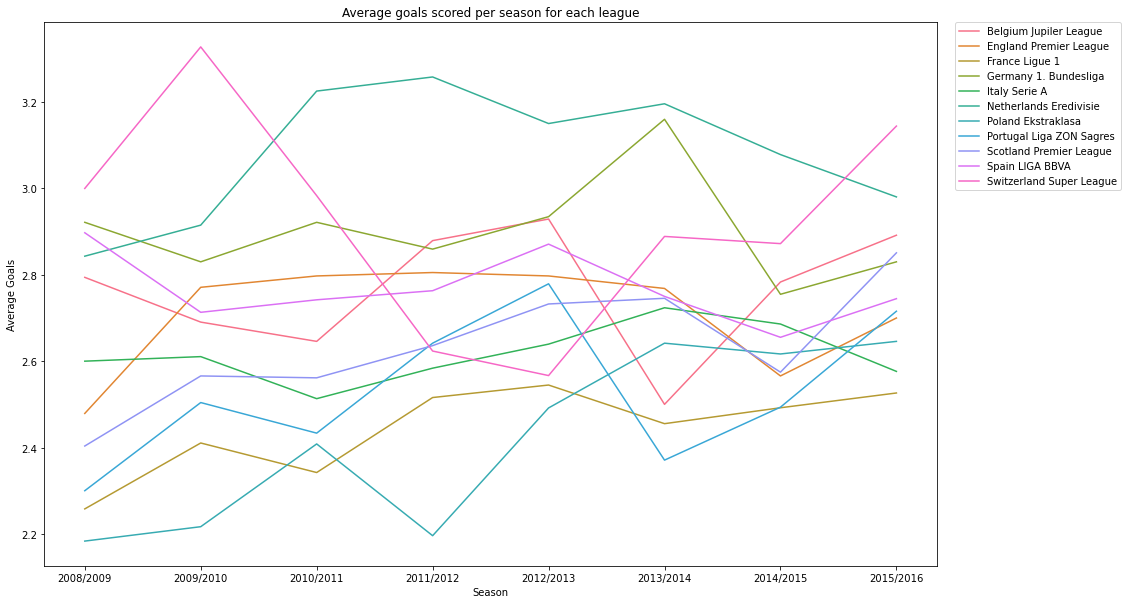

In [59]:
# Plot average goals for each season and league
fig, ax1 = plt.subplots(figsize=(16,10))
sns.lineplot(x='season', y='avg_goals', data=df_cl_agg, hue='league_name')
# Move the legend box outside of the plotting area
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Average goals scored per season for each league')
plt.ylabel('Average Goals')
plt.xlabel('Season')
plt.show()

The above does give an overview of the average goals per match for each leauge but let's make it even more clear by getting the country and leauge with the highest average per season:

In [60]:
# 1. Reset the index 
# 2. Sort by average goals
# 3. Use the duplicate function on the season column to delete all but the highest value for each season
# 4. Re-sort the values by season to show them in order
df_highest_avg = df_cl_agg.reset_index().sort_values('avg_goals').drop_duplicates(['season'],keep='last').sort_values('season')
df_highest_avg

,country_name,league_name,season,total_home_team_goals,total_away_team_goals,total_matches,total_goals,avg_goals
80,Switzerland,Switzerland Super League,2008/2009,316,224,180,540,3.000000
81,Switzerland,Switzerland Super League,2009/2010,359,240,180,599,3.327778
42,Netherlands,Netherlands Eredivisie,2010/2011,595,392,306,987,3.225490
43,Netherlands,Netherlands Eredivisie,2011/2012,585,412,306,997,3.258170
44,Netherlands,Netherlands Eredivisie,2012/2013,540,424,306,964,3.150327
45,Netherlands,Netherlands Eredivisie,2013/2014,568,410,306,978,3.196078
46,Netherlands,Netherlands Eredivisie,2014/2015,518,424,306,942,3.078431
87,Switzerland,Switzerland Super League,2015/2016,321,245,180,566,3.144444


Lets visualize the above table to see which countries and leagues that have the highest number of everage goals scored per match from 2008-2016.

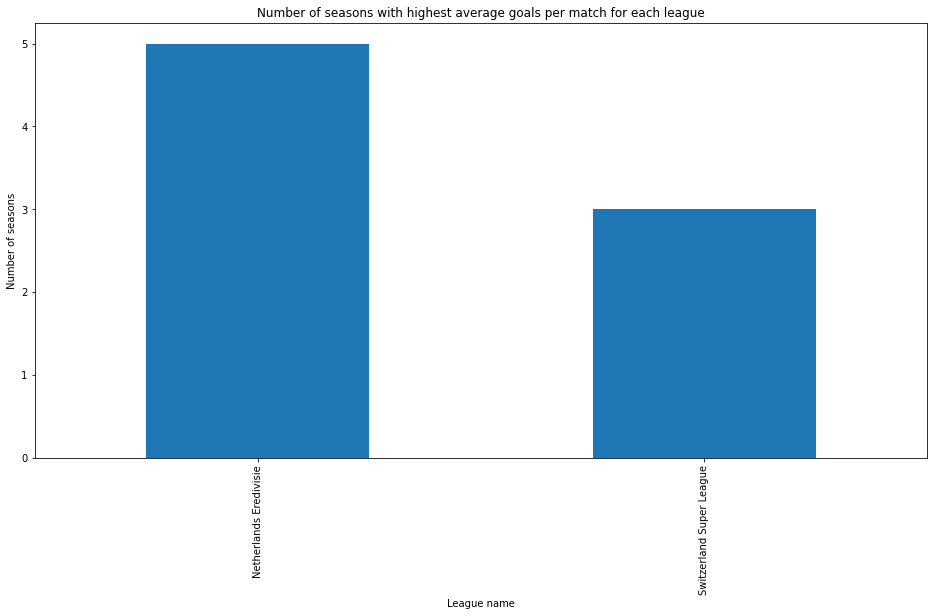

In [61]:
# Visualize leauges and the number of seasons they had the highest goal average per match
ax = df_highest_avg['league_name'].value_counts().plot(kind='bar', figsize=(16,8))
ax.set_xlabel("League name")
ax.set_ylabel("Number of seasons")
ax.set_title('Number of seasons with highest average goals per match for each league');

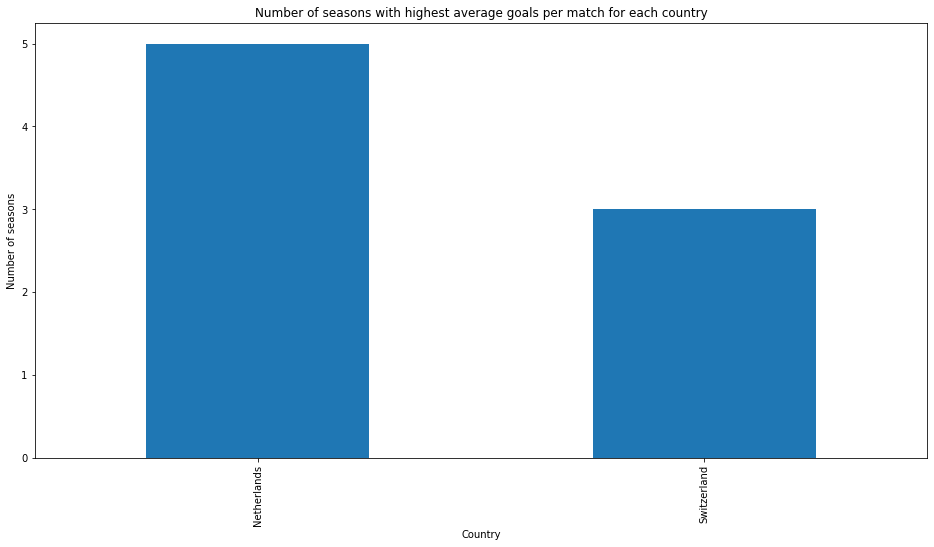

In [62]:
# Visualize leauges and the number of seasons they had the highest goal average per match
ax = df_highest_avg['country_name'].value_counts().plot(kind='bar', figsize=(16,8))
ax.set_xlabel("Country")
ax.set_ylabel("Number of seasons")
ax.set_title('Number of seasons with highest average goals per match for each country');

### Research Question 2  - Which are the most winning teams per country for the time period?

First add a column with the winning team

In [63]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Use the prepared dataset as the starting point
df_wt = df_combined

# Use numpy where to set winning team (and NaN if draw)
# 1. if home team goal > away team goal -> set home team id
# 2. if home team goal < away team goal -> set away team id
# 3. if none of the above conditions are true (draw) set NaN
df_wt['winning_team_id'] = np.where(df_wt['home_team_goal'] > df_wt['away_team_goal'], df_wt['home_team_api_id'], 
                                    np.where(df_wt['home_team_goal'] < df_wt['away_team_goal'], df_wt['away_team_api_id'], np.nan))

# add winning team name
df_wt['winning_team_name'] = np.where(df_wt['home_team_api_id'] == df_wt['winning_team_id'], df_wt['home_team_name'],
                                      np.where(df_wt['away_team_api_id'] == df_wt['winning_team_id'], df_wt['away_team_name'], np.nan)) 

df_wt_agg = df_wt.groupby(['country_name', 'league_name', 'winning_team_id', 'winning_team_name']).agg({'match_api_id': 'count'})

# Rename number of wins per team
df_wt_agg.rename(columns={'match_api_id':'no_of_wins'}, inplace=True)
                                                                                                                  
df_wt_agg.head(50)

no_of_wins
country_name league_name            winning_team_id winning_team_name                  
Belgium      Belgium Jupiler League 1773.0          Oud-Heverlee Leuven              22
                                    4049.0          Tubize                            7
                                    6351.0          KAS Eupen                         5
                                    7947.0          FCV Dender EH                     9
                                    8203.0          KV Mechelen                      79
                                    8342.0          Club Brugge KV                  123
                                    8475.0          Waasland-Beveren                 24
                                    8571.0          KV Kortrijk                      82
                                    8573.0          KV Oostende                      29
                                    8635.0          RSC Anderlecht                  136
                                    9984.0          KSV Cercle Brugge                58
                                    9985.0          Standard de Liège               106
                                    9986.0          Sporting Charleroi               55
                                    9987.0          KRC Genk                         97
                                    9989.0          Lierse SK                        22
                                    9991.0          KAA Gent                        109
                                    9993.0          Beerschot AC                     40
                                    9994.0          Sporting Lokeren                 74
                                    9996.0          Royal Excel Mouscron             12
                                    9997.0          Sint-Truidense VV                31
                                    9998.0          RAEC Mons                        25
                                    9999.0          KSV Roeselare                    12
                                    10000.0         SV Zulte-Waregem                 78
                                    10001.0         KVC Westerlo                     54
                                    274581.0        Royal Excel Mouscron             14
England      England Premier League 8191.0          Burnley                          15
                                    8197.0          Leicester City                   34
                                    8344.0          Cardiff City                      7
                                    8455.0          Chelsea                         176
                                    8456.0          Manchester City                 175
                                    8462.0          Portsmouth                       17
                                    8466.0          Southampton                      60
                                    8472.0          Sunderland                       78
                                    8483.0          Blackpool                        10
                                    8528.0          Wigan Athletic                   50
                                    8549.0          Middlesbrough                     7
                                    8559.0          Bolton Wanderers                 43
                                    8586.0          Tottenham Hotspur               151
                                    8602.0          Wolverhampton Wanderers          25
                                    8650.0          Liverpool                       150
                                    8654.0          West Ham United                  80
                                    8655.0          Blackburn Rovers                 42
                                    8658.0          Birmingham City                  21
                                    8659.0          West Bromwich Albion             75
                             

Since I am only interested in the most winning team per league and country I will take only the team with the highest number of wins for each league.

In [64]:
# 1. Reset the index 
# 2. Sort by number of wins
# 3. Use the duplicate function on the league name column to delete all but the highest value for each league
# 4. Re-sort the values by season to show them in order
df_most_winning = df_wt_agg.reset_index().sort_values('no_of_wins').drop_duplicates(['league_name'],keep='last').sort_values('league_name')
df_most_winning

,country_name,league_name,winning_team_id,winning_team_name,no_of_wins
9,Belgium,Belgium Jupiler League,8635.0,RSC Anderlecht,136
57,England,England Premier League,10260.0,Manchester United,192
84,France,France Ligue 1,9847.0,Paris Saint-Germain,175
117,Germany,Germany 1. Bundesliga,9823.0,FC Bayern Munich,193
149,Italy,Italy Serie A,9885.0,Juventus,189
165,Netherlands,Netherlands Eredivisie,8593.0,Ajax,181
202,Poland,Poland Ekstraklasa,8673.0,Legia Warszawa,137
221,Portugal,Portugal Liga ZON Sagres,9772.0,SL Benfica,185
247,Scotland,Scotland Premier League,9925.0,Celtic,218
268,Spain,Spain LIGA BBVA,8634.0,FC Barcelona,234


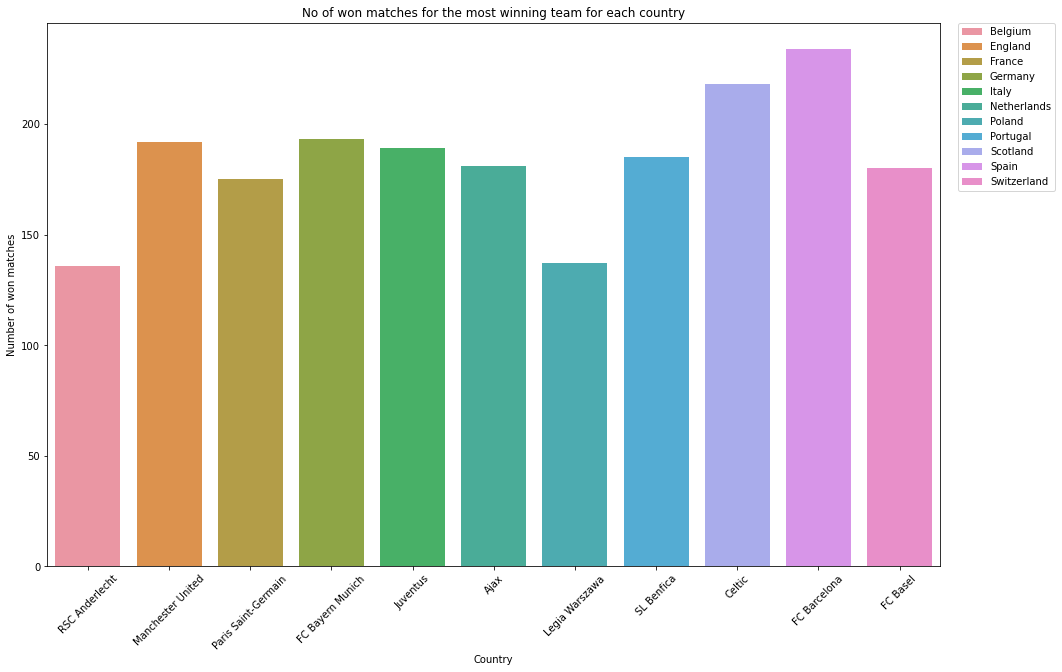

In [65]:
# Visualize the number of won matches for the most winning team from each league/country
fig, ax1 = plt.subplots(figsize=(16,10))
sns.barplot(x='winning_team_name', y='no_of_wins', data=df_most_winning, hue='country_name', dodge=False)
# Move the legend box outside of the plotting area
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('No of won matches for the most winning team for each country')
plt.ylabel('Number of won matches')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

<a id='conclusions'></a>
## Conclusions


Based on the above data analysis, these are my findings:

**Question 1**

The leagues with the highest goalscoring average per match are the Netherlands for 5 out of 8 seasons and Switzerland for 3 out of 8 seasons. More goals are scored in Netherlands than Switzerland but the also play more games per season.


**Question 2**

A list of the most winning teams for each league has been generated. These are the most winning teams:
    - RSC Anderlecht - Belgium - 136 won matches
    - Manchester United	- England - 192 won matches
    - Paris Saint-Germain - France - 175 won matches
    - FC Bayern Munich	- Germany - 193 won matches
    - Juventus - Italy - 189 won matches
    - Ajax - Netherlands - 181 won matches
    - Legia Warszawa - Poland - 137 won matches
    - SL Benfica - Portugal - 185 won matches
    - Celtic - Scotland - 218 won matches
    - FC Barcelona - Spain - 234 won matches
    - FC Basel - Switzerland - 180 won matches

The most winning team for the period is FC Barcelona from Spain with 234 won matches. 

**Limitations to exploration**

- In answering both questions I use a duplicate function to get only the last row with the highest number. In case there are multiple rows with the same value I will only take one of them which can be misleading.
- Very little has been done to verify the quality of the data when combined. There is a basic check for number of rows being unchanged but this i no guarantee for missing rows or wrong joins. A more thorough data analysis would be a good idea. 

**Further explorations**

This above analysis only scratches the surface of the data. There are so many other things that can be analysed:
- How is the win percentage for home vs away matches?
- Does the number of played matches per season make a difference to the goalscoring average?
- What are there any correlation for betting odds between the different betting companies?
- Which betting companies offer the best odds in general?
- etc.

**Help/input sources**
Seaborn lineplot: https://www.sharpsightlabs.com/blog/seaborn-lineplot/
Group by and aggregations: https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/
Using duplicate filter for taking highest value: https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby